<a href="https://colab.research.google.com/github/Abhilash11Addanki/DeepLearning/blob/main/Sarcasm_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2021-05-11 14:13:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 173.194.216.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2021-05-11 14:13:12 (148 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [2]:
import json

with open("/tmp/sarcasm.json","r") as f:
  datastore = json.load(f)

In [3]:
sentences,labels,urls = [],[],[]
for i in datastore:
  sentences.append(i['headline'])
  labels.append(i['is_sarcastic'])
  urls.append(i['article_link'])

In [4]:
print(sentences[10])
print(labels[10])

airline passengers tackle man who rushes cockpit in bomb threat
0


In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [7]:
train_sentences = sentences[0:training_size]
test_sentences = sentences[training_size:]
train_labels = labels[0:training_size]
test_labels = labels[training_size:]

In [8]:
tokenizer = Tokenizer(num_words = vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)

In [9]:
word_index = tokenizer.word_index
print(len(word_index))
# print(word_index)

25637


In [10]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)
print(train_padded[10])
print(train_padded.shape)

[3098 2216 3756   14   37 5653 8868    5 2094 1092    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
(20000, 100)


In [11]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)
print(test_padded[10])
print(test_padded.shape)

[1031 1230    1   18  136 1503    2 1028    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
(6709, 100)


In [12]:
import numpy as np
train_padded = np.array(train_padded)
train_labels = np.array(train_labels)
test_padded = np.array(test_padded)
test_labels = np.array(test_labels)

In [13]:
import tensorflow as tf

In [14]:
#Defining the layers
model = tf.keras.models.Sequential([tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(24,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')])

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 24)                38424     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 198,449
Trainable params: 198,449
Non-trainable params: 0
_________________________________________________________________


In [17]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('accuracy')>0.99:
      print('\nAchieved 99% accuracy so training cancelled')
      self.model.stop_training = True

In [18]:
history = model.fit(train_padded,train_labels,validation_data=(test_padded,test_labels),epochs=50,callbacks=[myCallback()])

Epoch 1/50
625/625 [==============================] - 4s 6ms/step - loss: 0.5745 - accuracy: 0.6615 - val_loss: 0.3361 - val_accuracy: 0.8504
Epoch 2/50
625/625 [==============================] - 3s 5ms/step - loss: 0.2133 - accuracy: 0.9166 - val_loss: 0.3276 - val_accuracy: 0.8647
Epoch 3/50
625/625 [==============================] - 3s 5ms/step - loss: 0.1127 - accuracy: 0.9640 - val_loss: 0.3704 - val_accuracy: 0.8602
Epoch 4/50
625/625 [==============================] - 3s 5ms/step - loss: 0.0524 - accuracy: 0.9870 - val_loss: 0.4454 - val_accuracy: 0.8557
Epoch 5/50
625/625 [==============================] - 3s 5ms/step - loss: 0.0252 - accuracy: 0.9949 - val_loss: 0.5128 - val_accuracy: 0.8538

Achieved 99% accuracy so training cancelled


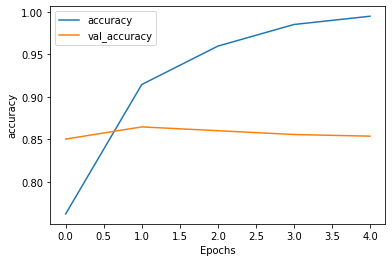

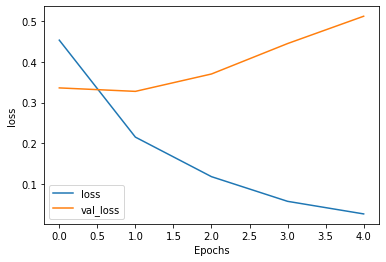

In [19]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [20]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [25]:
print(train_padded[0])

[ 328    1  799 3405 2404   47  389 2214    1    6 2614 8863    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [28]:
def decode_sentence(text):
  return ' '.join(reverse_word_index[x] for x in text if x>0)

In [29]:
print(decode_sentence(train_padded[0]))

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers


In [30]:
train_sentences[0]

"former versace store clerk sues over secret 'black code' for minority shoppers"

In [34]:
e = model.layers[0]
weights = e.get_weights()[0]

In [36]:
print(weights.shape)

(10000, 16)


In [38]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]

In [39]:
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [40]:
print(model.predict(padded))

[[0.90706325]
 [0.13297465]]
